# Deep Learning for IMDB Movie Recommendations

In [1]:
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Let's have a look at the data

In [3]:
type(train_data)

numpy.ndarray

In [4]:
train_data.shape

(25000,)

In [5]:
train_data.dtype

dtype('O')

In [6]:
type(train_data[0])

list

In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
word_index = imdb.get_word_index()

In [9]:
word_index['everyone']

313

## Let's build a Neural Network to predict the sentiment

In [10]:
import numpy as np

In [11]:
def vectorize_reviews(reviews, dictsize=10000):
    results = np.zeros((len(reviews), dictsize))
    for reviewindex, wordlist in enumerate(reviews):
        for word in wordlist:
            results[reviewindex, word] = 1.
            
    return results

In [12]:
x_train = vectorize_reviews(train_data)
x_test = vectorize_reviews(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [16]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [17]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
x_validation = x_train[:10000]
partial_x_train = x_train[10000:]
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/sample - loss: 0.4890 - accuracy: 0.7893 - val_loss: 0.3653 - val_accuracy: 0.8732
Epoch 2/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.2892 - accuracy: 0.9064 - val_loss: 0.3001 - val_accuracy: 0.8852
Epoch 3/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.2155 - accuracy: 0.9290 - val_loss: 0.2877 - val_accuracy: 0.8842
Epoch 4/20
15000/15000 [==============================] - 1s 39us/sample - loss: 0.1698 - accuracy: 0.9441 - val_loss: 0.2777 - val_accuracy: 0.8871
Epoch 5/20
15000/15000 [==============================] - 1s 40us/sample - loss: 0.1361 - accuracy: 0.9566 - val_loss: 0.2853 - val_accuracy: 0.8860
Epoch 6/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.1121 - accuracy: 0.9659 - val_loss: 0.3003 - val_accuracy: 0.8827
Epoch 7/20
15000/15000 [==============================] 

In [20]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

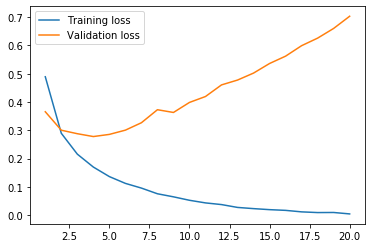

In [27]:
epochs = range(1, len(training_loss) +1)
plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Validation loss')
plt.legend()

In [25]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [28]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = network.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_validation, y_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 96us/sample - loss: 0.4910 - accuracy: 0.7978 - val_loss: 0.3590 - val_accuracy: 0.8778
Epoch 2/4
15000/15000 [==============================] - 1s 43us/sample - loss: 0.2880 - accuracy: 0.9059 - val_loss: 0.2987 - val_accuracy: 0.8857
Epoch 3/4
15000/15000 [==============================] - 1s 44us/sample - loss: 0.2179 - accuracy: 0.9255 - val_loss: 0.2894 - val_accuracy: 0.8798
Epoch 4/4
15000/15000 [==============================] - 1s 41us/sample - loss: 0.1711 - accuracy: 0.9450 - val_loss: 0.2749 - val_accuracy: 0.8907
